# Load data

In [1]:
!wget -qO- https://drive.google.com/uc?id=1qLX0ikPjBdSutO_vsNdthC6DGVmyL-e6 > who_life_exp.csv

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [3]:
data_df = pd.read_csv('who_life_exp.csv')

In [4]:
data_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


# Khám Phá dữ liệu

## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
num_rows, num_cols = data_df.shape

In [6]:
num_rows, num_cols

(3111, 32)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin của một quốc gia về các yếu tố ảnh hưởng đến tuổi thọ, và có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

## Dữ liệu có các dòng bị lặp không?

In [7]:
data_df.duplicated().sum()

0

- Vậy bộ dữ liệu này không có dòng nào bị lặp

## Mỗi cột có ý nghĩa gì?

|Thuộc tính | Mô tả |
|:------:| ---|
|Country| Tên quốc gia|
|country_code| Định danh ba chữ cái của một quốc gia|
|region| Khu vực toàn cầu của đất nước|
|year| Năm|
|life_expect| Tuổi thọ trung bình (tuổi)|
|life_exp60| Tuổi thọ trung bình 60(tuổi)|
|adult_mortality|Tỷ lệ tử vong ở người trưởng thành (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
|infant_mort|Tỷ lệ tử vong dưới 1 tuổi|
|age1-4mort|Tỷ lệ tử vong từ 1 đến 4 tuổi|
|alcohol|Rượu, mức tiêu thụ bình quân đầu người (15+) được ghi nhận|
|bmi|BMI trung bình (ước tính chuẩn hóa theo độ tuổi)|
|age5-19thinness|Tỷ lệ gầy ở trẻ em và thanh thiếu niên|
|age5-19obesity	|Tỷ lệ béo phì ở trẻ em và thanh thiếu niên|
|hepatitis|Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ 1 tuổi (%)|
|measles|Tỷ lệ tiêm chủng liều đầu tiên (MCV1) có chứa vắc xin sởi cho trẻ 1 tuổi (%)|
|polio| Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ 1 tuổi (%)|
|diphtheria|Tỷ lệ tiêm chủng giải độc tố uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%)|
|basic_water|Dân số sử dụng ít nhất các dịch vụ nước uống đạt tiêu chuẩn|
|doctors|Bác sĩ y khoa (trên 10.000)|
|hospitals|Số lượng bệnh viện trên 100.000 dân|
|gni_capita|Tổng thu nhập quốc dân trên đầu người (tổng thu thập mà người dân và doanh nghiệp của quốc gia kiếm được)|
|gghe-d	|Chi tiêu chung cho y tế của chính phủ trong nước tính theo tỷ lệ phần trăm của tổng sản phẩm quốc nội (GDP) (%)|
|che_gdp|Chi tiêu cho y tế hiện tại (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%)|
|une_pop|Dân số (hàng nghìn)|
|une_infant|Tỷ lệ tử vong, trẻ sơ sinh (trên 1.000 trẻ sống)|
|une_life|Tuổi thọ trung bình|
|une_hiv|Tỷ lệ nhiễm HIV, tổng số (\% dân số từ 15-49 tuổi)|
|une_gni|Tổng thu nhập quốc dân trên đầu người|
|une_poverty|Tỷ lệ số người nghèo ở mức 1,90 đô la một ngày (PPP) (\% dân số)|
|une_edu_spend|Chi tiêu của chính phủ cho giáo dục tính theo phần trăm GDP (\%)|
|une_literacy|Tỷ lệ người lớn biết chữ, dân số trên 15 tuổi, cả hai giới (\%)|
|une_school|Số năm đi học trung bình (ISCED 1 trở lên), dân số từ 25 tuổi trở lên, cả hai giới|

**Các thuộc tính có tên une_** được thống kê bởi tổ chức UNESCO.

**Các thuộc tính còn lại** được thống kê bởi GHO (Global Health Observatory).


In [8]:
data_df['doctors'].isna().mean()

0.42783670845387334

## Mỗi cột hiện đang có kiểu dữ liệu gì?

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

- Các cột đều có kiểu dữ liệu phù hợp

## Sự phân bố của dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [10]:
df_categorical = data_df.select_dtypes(include = 'object')
def missing_ratio(series):
  return series.isna().mean()
def num_diff_vals(series):
  return series.nunique()
def value_ratios(series):
  return dict((series.value_counts()))
cate_col_profiles_df = df_categorical.agg([missing_ratio,num_diff_vals,value_ratios])
cate_col_profiles_df

,country,country_code,region
missing_ratio,0,0,0
num_diff_vals,183,183,6
value_ratios,"{'Nicaragua': 17, 'Denmark': 17, 'Sudan': 17, ...","{'KGZ': 17, 'MRT': 17, 'ARG': 17, 'PAK': 17, '...","{'Europe': 850, 'Africa': 799, 'Americas': 561..."


### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [11]:
columns_numeric = data_df.select_dtypes(exclude = 'object').columns
describe_expectancy = data_df[columns_numeric].describe()
missing_ratio_numeric = data_df[columns_numeric].isna().mean().to_frame().T.rename(index={0:'missing_ratio'})
pd.concat([missing_ratio_numeric,describe_expectancy],axis=0)

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016072,0.010929,0.010929,0.010929,0.182899,0.006107,0.006107,0.006107,0.010286,0.427837,0.958213,0.219222,0.032144,0.037608,1.189328e-02,0.000000,0.000000,0.238187,0.037608,0.706525,0.413372,0.816458,0.741241
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,2542.000000,3092.000000,3092.000000,3092.000000,3079.000000,1780.000000,130.000000,2429.000000,3011.000000,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,85.436271,85.540427,86.608991,86.420116,83.332011,19.866038,2.044878,13397.146974,3.122935,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,17.099786,15.282246,14.943226,15.332160,19.255119,14.071207,5.059339,16258.593973,2.091720,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,16.000000,8.000000,19.000000,18.695210,0.128000,0.000000,250.000000,0.062360,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,81.000000,79.000000,81.000000,82.000000,71.658310,6.391250,0.535162,2540.000000,1.533445,4.238797,2.195106e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,92.000000,92.000000,93.000000,93.000000,91.994080,20.523500,1.072725,7460.000000,2.601300,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,97.000000,96.000000,97.000000,97.000000,98.552870,30.981750,2.104830,18250.000000,4.278110,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,99.000000,99.000000,99.000000,100.000010,79.541000,56.446950,123860.000000,12.062730,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


## xóa các thuộc tính thiếu hơn 50% giá trị thuộc tính

In [12]:
thresold =0.5
missing_sr = data_df.agg(missing_ratio)
name_columns_drop = missing_sr[missing_sr > thresold].index
print(f"Cac thuoc tinh bi xoa: {name_columns_drop}")
data_df = data_df.drop(columns=name_columns_drop, axis=1)

Cac thuoc tinh bi xoa: Index(['hospitals', 'une_poverty', 'une_literacy', 'une_school'], dtype='object')


In [13]:
data_df.shape

(3111, 28)

In [14]:
name_columns_drop

Index(['hospitals', 'une_poverty', 'une_literacy', 'une_school'], dtype='object')

## Điền giá trị thiếu


In [15]:
#clean_df = clean_df.groupby('country').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

# Tìm các insight

## Mối tương quan giữa các thuộc tính

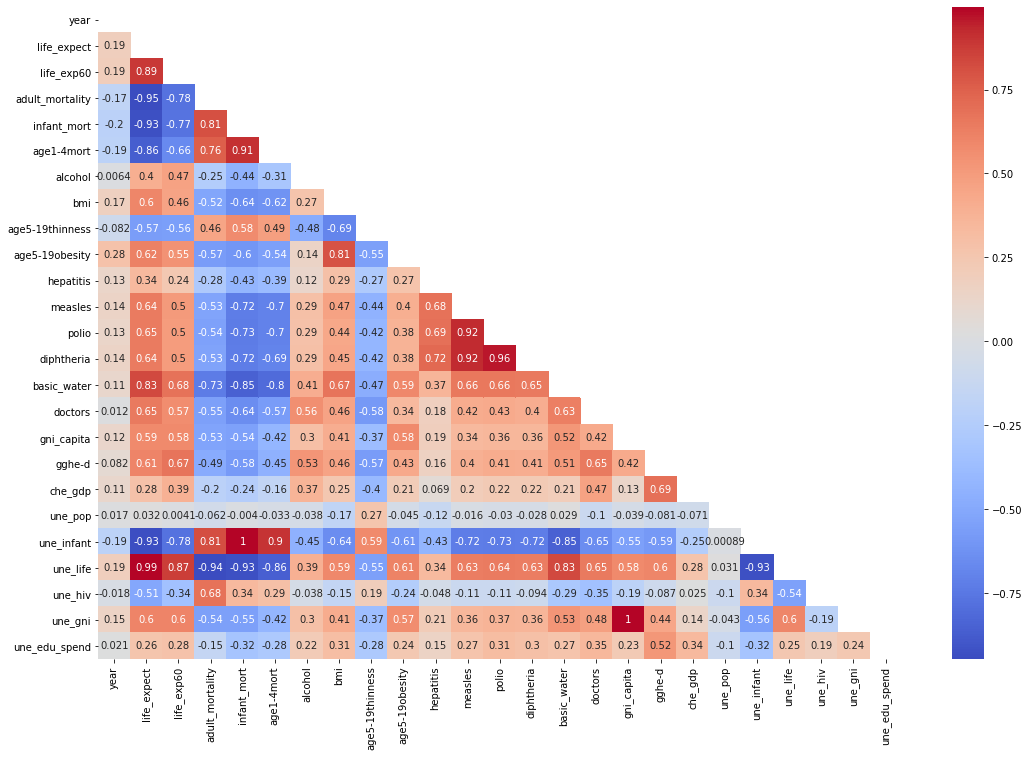

In [16]:
mask = np.triu(np.ones_like(data_df.corr()))
plt.subplots(figsize=(18,12))
dataplot = sns.heatmap(data_df.corr(), cmap="coolwarm", annot=True, mask=mask)

**Nhận xét:**
Từ biểu đồ trên, ta có thể dự đoán rằng có nhiều thuộc tính "basic_water", "doctors","measles" ... có ảnh hưởng mạnh tới tuổi thọ.

## Mức độ biến động tuổi thọ trung bình của toàn thế giới là như thế nào?

In [17]:
mean_life_expectancy_sr = data_df.groupby('year')['life_expect'].mean()
mean_life_expectancy_sr

year
2000    66.381261
2001    66.759911
2002    66.981275
2003    67.194990
2004    67.536497
2005    67.918202
2006    68.382742
2007    68.817387
2008    69.228267
2009    69.679568
2010    69.912222
2011    70.457992
2012    70.722041
2013    71.026033
2014    71.225480
2015    71.476842
2016    71.787813
Name: life_expect, dtype: float64

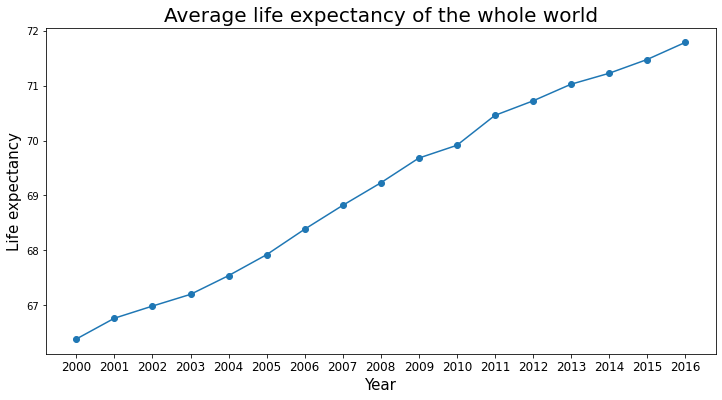

In [18]:
mean_life_expectancy_sr.plot.line(marker='o',figsize=(12,6))
plt.xticks(range(mean_life_expectancy_sr.index.min(),mean_life_expectancy_sr.index.max()+1),size=12)
plt.xlabel('Year',size=15)
plt.ylabel('Life expectancy',size=15)
plt.title('Average life expectancy of the whole world',size=20)
plt.show()

**Nhận xét:** Tuổi thọ trung bình của toàn thế giới tăng qua từng năm và đạt giá trị cao nhất vào năm 2016 với tuổi thọ trung bình là 71.8 tuổi.

## Sự phân bố tuổi thọ của các quốc gia

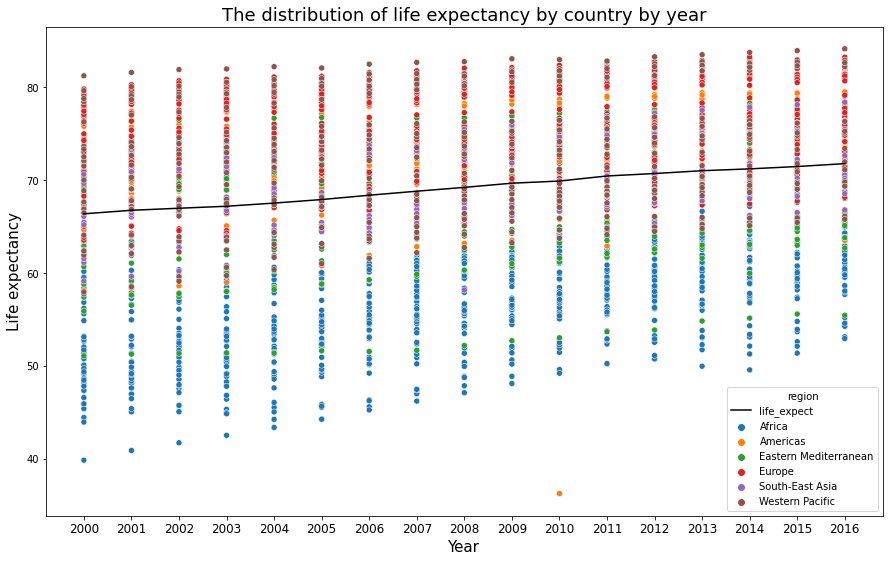

In [19]:
plt.figure(figsize=(15,9))
mean_life_expectancy_sr.plot.line(color='black')
sns.scatterplot(x=data_df['year'],y=data_df['life_expect'],hue=data_df['region'])
plt.xticks(range(data_df['year'].min(), data_df['year'].max()+1),size=12)
plt.xlabel('Year',size = 15)
plt.ylabel('Life expectancy',size = 15)
plt.title('The distribution of life expectancy by country by year',size=18)
plt.show()

**Nhận xét:** Hầu hết các quốc gia ở phía Châu Âu và 1 số quốc gia ở phía Tây Thái Bình Dương có tuổi thọ trung bình cao hơn so với các khu vực còn lại trên thế giới và cao hơn mức trung bình của thế giới

### kiểm tra trường hợp nghi ngờ outlier ở khu vực châu mỹ vào năm 2010

In [20]:
america_2010_df = data_df[(data_df['region'] == 'Americas') & (data_df['year'] == 2010)]
index_min = america_2010_df['life_expect'].idxmin()
america_2010_df.loc[[index_min]]

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
1166,Haiti,HTI,Americas,2010,36.22736,10.728,682.5308,0.077865,0.0211,2.31526,24.6,4.1,7.5,NaN,64.0,66.0,67.0,62.20079,NaN,1490.0,1.45539,8.1456,9949.322,85.6,60.511,2.1,1480.0,NaN


In [21]:
data_df[data_df['country'] == 'Haiti'][['year','life_expect']]

,year,life_expect
1156,2000,58.11105
1157,2001,58.35919
1158,2002,58.61541
1159,2003,58.97600
1160,2004,58.44833
1161,2005,60.78857
1162,2006,61.89331
1163,2007,62.84785
1164,2008,63.20292
1165,2009,63.52611


**Nhận xét:** Đất nước bị nghi ngờ outlier đó chính là haiti, nhưng điều đó không đúng. Bởi vì, vào năm 2010, đất nước Haiti xảy ra động đất sóng thần cướp đi sinh mạng của hàng ngàn người ở quốc gia này. Chính vì thế, tuổi thọ trung bình giảm trong năm đó là hoàn toàn chính xác. Để tránh việc phân tích dữ liệu được chính xác, ta sẽ loại bỏ dữ liệu năm 2010 ở Haiti.

In [22]:
data_df = data_df[~((data_df['country'] == 'Haiti') & (data_df['year'] == 2010))].reset_index(drop=True)

## Với mỗi châu lục, Tuổi thọ trung bình là như thế nào?

In [23]:
life_expect_region_df = data_df.groupby('region').agg({'life_expect':'mean'}).rename(columns={'life_expect':'mean_life_expect'})
life_expect_region_df = life_expect_region_df.sort_values(by='mean_life_expect',ascending=True)
life_expect_region_df

,mean_life_expect
region,
Africa,57.679362
South-East Asia,68.667484
Eastern Mediterranean,69.741827
Western Pacific,72.233377
Americas,73.271295
Europe,75.805259


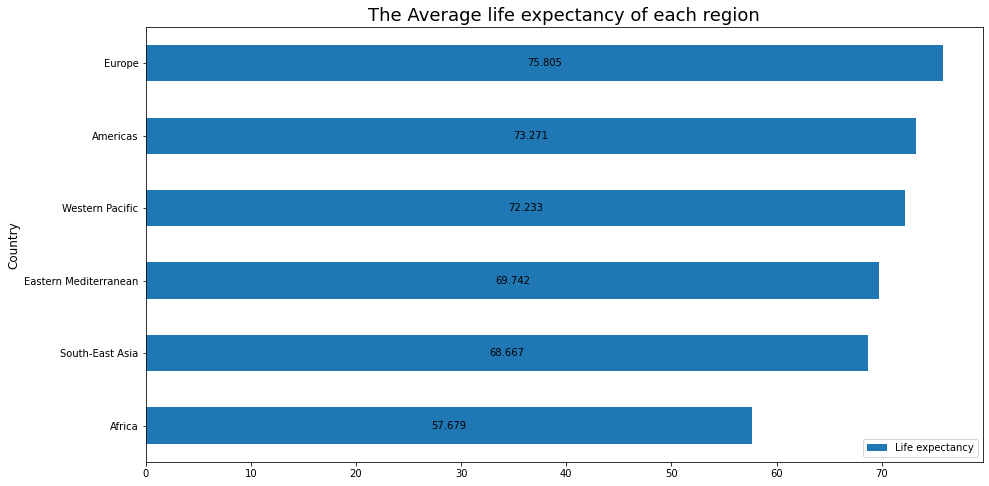

In [24]:
ax = life_expect_region_df.reset_index().plot(kind='barh',x='region',y='mean_life_expect', figsize=(15,8),label='Life expectancy')
plt.ylabel('Country',size=12)
plt.title('The Average life expectancy of each region',size=18)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds  
    ax.annotate(format(round(float(width),3), ','), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')
plt.show()

**Nhận xét:** Tuổi thọ trung bình ở khu vực châu Phi có sự chênh lệch lớn so với các châu lục khác trên thế giới.

## Với mỗi quốc gia, tuổi thọ trung bình là như thế nào?

### 10 quốc gia có tuổi thọ trung bình cao nhất thế giới

In [25]:
life_expectancy_country = data_df.groupby('country').agg({'life_expect':'mean'})
mean_expectancy_df = life_expectancy_country.rename(columns={'life_expect':'Mean life_expect'})
mean_expectancy_df.sort_values(by=['Mean life_expect'], ascending=False, inplace = True)

In [26]:
country_status = data_df[['country','region']]
country_status = country_status[~country_status.duplicated()]
country_expectancy_df = mean_expectancy_df.merge(country_status, left_on='country', right_on='country')
top_10_expectancy = country_expectancy_df[:10]
top_10_expectancy

,country,Mean life_expect,region
0,Japan,82.753574,Western Pacific
1,Switzerland,81.848187,Europe
2,Australia,81.543989,Western Pacific
3,Iceland,81.507846,Europe
4,Italy,81.490516,Europe
5,Spain,81.391195,Europe
6,Sweden,81.161942,Europe
7,Singapore,81.070605,Western Pacific
8,Canada,81.067231,Americas
9,France,81.029753,Europe


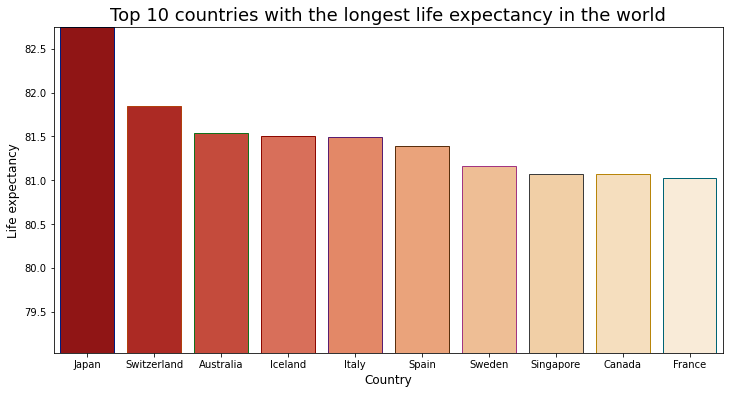

In [27]:
plt.subplots(figsize=(12,6))
sns.barplot(x=top_10_expectancy['country'], y=top_10_expectancy['Mean life_expect'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',25))
plt.ylabel('Life expectancy',size=12)
plt.xlabel('Country',size=12)
plt.title('Top 10 countries with the longest life expectancy in the world', size=18)
plt.ylim(min(top_10_expectancy['Mean life_expect'])-2, max(top_10_expectancy['Mean life_expect']))
plt.show()

In [28]:
top_10_expectancy['region'].value_counts(normalize = True) *100

Europe             60.0
Western Pacific    30.0
Americas           10.0
Name: region, dtype: float64

**Nhận xét:**
Nhận thấy trong top 10 các quốc gia tuổi thọ trung bình cao nhất thế giới thì hầu hết tập trung ở các nước Châu Âu và 1 số nước ở Châu Á. Tuy nhiên, số liệu ở đây là tính trong khoảng thời gian từ năm 2000->2016 nên sự so sánh ở đây còn khá khập khiễng, chưa phản ánh đúng sự chú ý đến tuổi thọ của chính phủ các quốc gia trong những năm gần đây.

### 10 quốc gia có tuổi thọ trung bình thấp nhất thế giới

In [29]:
tail_10_expectancy = country_expectancy_df[-10:]
tail_10_expectancy

,country,Mean life_expect,region
173,Mozambique,53.536801,Africa
174,Somalia,52.803960,Eastern Mediterranean
175,Côte d'Ivoire,51.484058,Africa
176,Zimbabwe,51.274442,Africa
177,Nigeria,51.192344,Africa
178,Chad,50.831692,Africa
179,Eswatini,50.260278,Africa
180,Lesotho,49.927415,Africa
181,Central African Republic,48.215201,Africa
182,Sierra Leone,46.791260,Africa


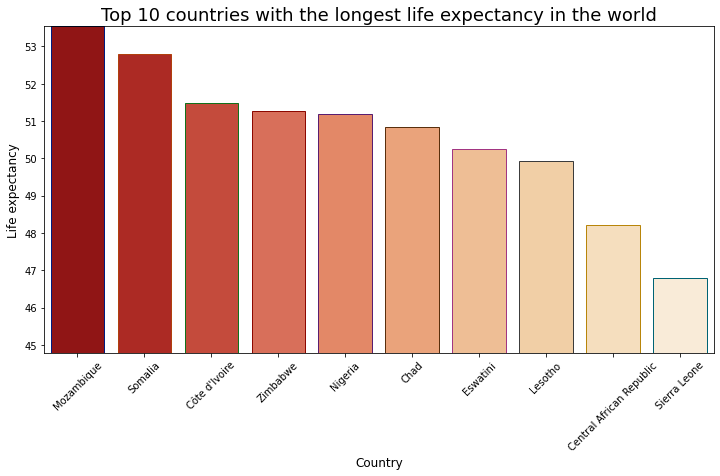

In [30]:
plt.subplots(figsize=(12,6))
sns.barplot(x=tail_10_expectancy['country'], y=tail_10_expectancy['Mean life_expect'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',25))
plt.xticks(rotation=45)
plt.ylabel('Life expectancy',size=12)
plt.xlabel('Country',size=12)
plt.title('Top 10 countries with the longest life expectancy in the world', size=18)
plt.ylim(min(tail_10_expectancy['Mean life_expect'])-2, max(tail_10_expectancy['Mean life_expect']))
plt.show()

In [31]:
tail_10_expectancy['region'].value_counts(normalize = True) *100

Africa                   90.0
Eastern Mediterranean    10.0
Name: region, dtype: float64

**Nhận xét:**
Nhận thấy trong top 10 các quốc gia tuổi thọ trung bình thấp nhất thế giới thì hầu hết tập trung ở các nước Châu Phi. Nguyên nhân ...

## Tốc độ tăng trưởng của mỗi khu vực là như thế nào?

In [32]:
min_year = data_df['year'].min()
max_year = data_df['year'].max()

In [33]:
df1 = data_df[data_df['year'].isin([min_year,max_year])]
df1.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,2.60753
16,Angola,AGO,Africa,2016,62.63262,17.34829,237.9694,0.057900,0.007520,5.38006,23.3,8.3,2.4,55.0,45.0,53.0,59.0,55.08428,NaN,NaN,1.19754,2.71315,28842.489,55.5,59.925,1.9,6410.0,NaN
17,Burundi,BDI,Africa,2000,51.43743,15.71862,369.9736,0.103510,0.017145,7.17131,20.6,9.1,0.3,NaN,72.0,71.0,80.0,50.66312,NaN,580.0,1.46507,6.17697,6378.871,95.7,49.091,3.3,580.0,2.64548
33,Burundi,BDI,Africa,2016,60.09811,16.59126,290.1858,0.052420,0.006450,3.88586,21.7,7.3,1.9,94.0,93.0,94.0,94.0,60.20415,NaN,NaN,1.80345,7.49216,10487.995,44.0,60.528,1.2,740.0,4.69272
34,Benin,BEN,Africa,2000,55.60088,16.44590,281.8114,0.096595,0.015685,1.43565,22.1,9.9,0.8,NaN,70.0,78.0,78.0,61.45970,NaN,1200.0,1.10300,4.23001,6865.951,86.4,55.391,1.3,1320.0,2.88869


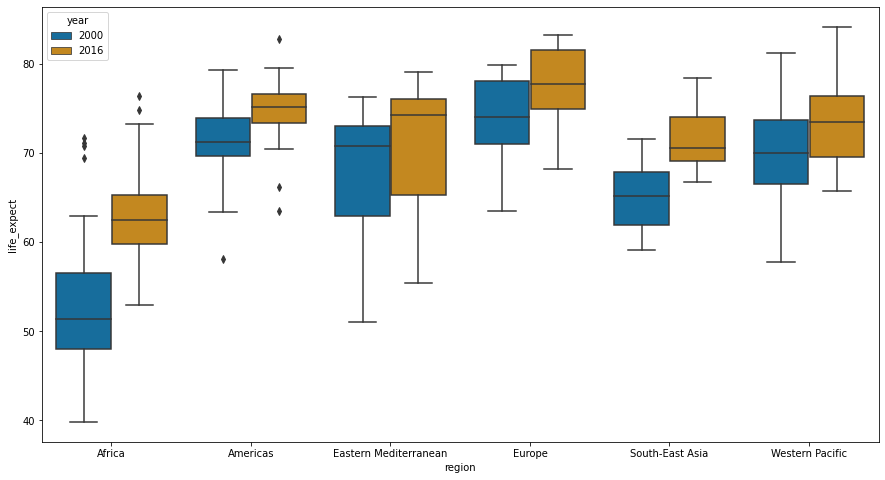

In [34]:
plt.subplots(figsize=(15,8))
sns.boxplot(y='life_expect', x='region', 
                 data=df1, 
                 palette="colorblind",
                 hue='year')

**Nhận xét:**
- Tăng trưởng tuổi thọ lớn nhất trong 15 năm được quan sát được quan sát thấy ở Khu vực Đông Nam Á.
- Các quốc gia trong Khu vực châu Mỹ là đồng nhất về tuổi thọ, mặc dù Bolivia và Haiti có giá trị thấp hơn so với các quốc gia khác trong khu vực. Dân số của các quốc gia châu Phi có tuổi thọ thấp nhất, trong khi Cape Verde là ngoại lệ với tuổi thọ cao.

##Tốc độ tăng trưởng tuổi thọ của các quốc gia trên thế giới trong 3 gần đây nhất

- Để có cái nhìn chính xác hơn, ta chỉ lấy số liệu trong 3 năm gần đây nhất. Phần này, nhóm sẽ có cái nhìn tổng quát hơn về số liệu như đưa ra tốc độ tăng trưởng trung bình trong 3 năm và từ đó có thể dự đoán tuổi thọ trung bình các quốc gia đó trong các năm tiếp theo.

In [35]:
def life_expectancy_growth_rate(country,expectancy_df):
  sort_year_expectancy_df = expectancy_df[expectancy_df['country'] == country].sort_values(by = 'year')[-3:]
  expectancy_values = sort_year_expectancy_df['life_expect'].values
  mean_growth_rate_year = (np.diff(expectancy_values) / expectancy_values[:-1])*100
  return country, mean_growth_rate_year.mean()

In [36]:
country_rate_growth = [life_expectancy_growth_rate(country,data_df) for country in data_df['country'].unique()]
country_rate_growth = dict(country_rate_growth)
country_rate_growth_df = pd.Series(country_rate_growth).to_frame().reset_index()
country_rate_growth_df.columns=['country','Rate growth life expectancy']

In [37]:
max_year = data_df[data_df['year'] == data_df['year'].max()]
country_rate_growth_df = country_rate_growth_df.merge(max_year[['country','year','life_expect','region']],left_on='country',right_on='country')
country_rate_growth_df = country_rate_growth_df.sort_values(by='life_expect',ascending=False).reset_index(drop=True)
country_rate_growth_df.head(10)

,country,Rate growth life expectancy,year,life_expect,region
0,Japan,0.232679,2016,84.16616,Western Pacific
1,Switzerland,-0.008585,2016,83.26371,Europe
2,Spain,0.040871,2016,83.07912,Europe
3,Singapore,0.226378,2016,82.94685,Western Pacific
4,France,0.228772,2016,82.94602,Europe
5,Australia,0.139382,2016,82.90018,Western Pacific
6,Canada,0.254652,2016,82.80972,Americas
7,Italy,-0.039163,2016,82.77284,Europe
8,Republic of Korea,0.289260,2016,82.66409,Western Pacific
9,Norway,0.151890,2016,82.47630,Europe


### Với các quốc gia ở Châu Âu

In [38]:
europe_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Europe']
europe_country.head()

,country,Rate growth life expectancy,year,life_expect,region
1,Switzerland,-0.008585,2016,83.26371,Europe
2,Spain,0.040871,2016,83.07912,Europe
4,France,0.228772,2016,82.94602,Europe
7,Italy,-0.039163,2016,82.77284,Europe
9,Norway,0.151890,2016,82.47630,Europe


In [39]:
europe_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,50.000000,50.000000
mean,77.819102,0.223157
std,4.179629,0.238465
min,68.164240,-0.144451
25%,74.879868,0.035326
50%,77.757440,0.202619
75%,81.518637,0.315055
max,83.263710,1.218504


**Nhận xét:** Hầu hết các các quốc gia ở Châu Âu có tuổi thọ trung bình tương đối cao (khoảng 78 tuổi) và tốc độ tăng tuổi thọ mỗi năm ở mức độ vừa phải (khoảng 0.2%). Bởi vì tuổi thọ con người có mức hạn nhất định, nên khi đến độ tuổi trên 80, hiện tượng lão hóa ở người lớn bắt đầu có dấu hiệu thì tốc độ tăng tuổi thọ sẽ không còn được cao so với các độ tuổi thấp hơn.

In [40]:
europe_country[europe_country['Rate growth life expectancy'] > 0.5]

,country,Rate growth life expectancy,year,life_expect,region
86,Belarus,0.606144,2016,74.15955,Europe
98,Ukraine,1.218504,2016,72.49735,Europe
104,Russian Federation,0.514653,2016,71.86533,Europe
109,Kyrgyzstan,0.626104,2016,71.40205,Europe
110,Kazakhstan,0.667497,2016,71.14480,Europe
127,Turkmenistan,0.529173,2016,68.16424,Europe


**Nhận xét:** Nhận thấy hầu hết các quốc gia có tốc độ tăng tuổi thọ khá cao điển hình như Belarus, Ukraine, Nga, ..(từ liên xô chia ra) đều có tuổi thọ trung bình thấp hơn các quốc gia khác trong khu vực. Nguyên nhân ...

Nguồn: https://www.ncbi.nlm.nih.gov/books/NBK62583/

In [41]:
europe_country[europe_country['Rate growth life expectancy'] < 0]

,country,Rate growth life expectancy,year,life_expect,region
1,Switzerland,-0.008585,2016,83.26371,Europe
7,Italy,-0.039163,2016,82.77284,Europe
11,Iceland,-0.005977,2016,82.39584,Europe
16,Netherlands,-0.048216,2016,81.63280,Europe
19,Malta,-0.029308,2016,81.49574,Europe
23,Belgium,-0.022273,2016,81.16279,Europe
24,Greece,-0.054121,2016,81.16033,Europe
25,Germany,-0.003444,2016,81.00278,Europe
26,Slovenia,-0.010794,2016,80.91451,Europe
97,Georgia,-0.144451,2016,72.58357,Europe


**Nhận xét:** Có 1 số nước bị giảm tuổi thọ tương đối lớn như Thụy Si, Bỉ, Đức, Ý (tập trung ở Đông Âu). Nguyên nhân trong khoảng thời gian 2013-2016, các nước này bị một số nguồn lây nhiễm Non-Communicable Diseases, nên tỉ lệ tử vong ngày càng nhiều và dẫn đến tuổi thọ trung bình bị giảm xuống nhưng tỉ lệ giảm xuống không đáng kể.

### Với các quốc gia ở Châu Phi

In [42]:
Africa_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Africa']
Africa_country.head()

,country,Rate growth life expectancy,year,life_expect,region
53,Algeria,0.181456,2016,76.36365,Africa
81,Mauritius,0.328431,2016,74.82426,Africa
92,Seychelles,0.239733,2016,73.26278,Africa
94,Cabo Verde,0.295804,2016,73.16841,Africa
125,Sao Tome and Principe,0.294180,2016,68.72415,Africa


In [43]:
Africa_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,47.000000,47.000000
mean,62.526440,0.908341
std,5.396261,0.680389
min,52.938010,0.091400
25%,59.813050,0.561000
50%,62.495410,0.777371
75%,65.238830,1.036720
max,76.363650,3.542276


**Nhận xét:** Hầu hết các các quốc gia ở Châu  Phi có tuổi thọ trung bình tương đối thấp (khoảng 65 tuổi) và tốc độ tăng tuổi thọ mỗi năm ở mức độ vừa phải (khoảng 0.7%). Nguyên nhân ...

In [44]:
Africa_country[Africa_country['Rate growth life expectancy'] > 2]

,country,Rate growth life expectancy,year,life_expect,region
155,Liberia,3.425052,2016,62.94294,Africa
166,Mozambique,2.170155,2016,60.09870,Africa
180,Sierra Leone,3.542276,2016,53.13050,Africa


**Nhận xét:** Ngược lại, 1 số quốc gia đang có mức độ giảm tuổi thọ đáng báo động như Niger, Gambia, Nam Phi, (đa số tập trung hầu hết ở các nước Nam Phi). Một trong những vấn đề sức khỏe lớn nhất mà châu Phi phải đối mặt là đại dịch HIV / AIDS. HIV / AIDS đã cướp đi sinh mạng của nhiều người ở châu Phi, đó là lý do chính khiến tuổi thọ trung bình thấp đến vậy. Việc chữa trị những căn bệnh này rất khó khăn vào thời kỳ cao điểm của dịch bệnh, rất nhiều người châu Phi đã không may qua đời.

Nguồn: https://borgenproject.org/life-expectancy-in-africa-improves/

### với các quốc gia ở châu Á

In [45]:
western_pacific_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Western Pacific']
western_pacific_country.head()

,country,Rate growth life expectancy,year,life_expect,region
0,Japan,0.232679,2016,84.16616,Western Pacific
3,Singapore,0.226378,2016,82.94685,Western Pacific
5,Australia,0.139382,2016,82.90018,Western Pacific
8,Republic of Korea,0.289260,2016,82.66409,Western Pacific
14,New Zealand,0.238610,2016,82.24739,Western Pacific


In [46]:
western_pacific_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,21.000000,21.000000
mean,74.134015,0.265643
std,6.039573,0.118364
min,65.790890,0.010789
25%,69.595250,0.224204
50%,73.429950,0.238610
75%,76.427420,0.296795
max,84.166160,0.523393


**Nhận xét:** 
- Các các quốc gia ở Châu Á có tuổi thọ trung bình ở mức độ trung bình (khoảng 74 tuổi).
- Tất cả các nước ở châu Á đều có tốc độ tăng tuổi thọ mỗi năm đều tăng và mức độ tăng ở mức độ vừa phải (khoảng 0.25%).

### Tìm hiểu đất nước thân yêu của chúng ta "Việt Nam"

In [47]:
western_pacific_country[western_pacific_country['country'] == 'Viet Nam']

,country,Rate growth life expectancy,year,life_expect,region
54,Viet Nam,0.233217,2016,76.33917,Western Pacific


**Nhận xét:** Đất nước chúng ta có tuổi thọ trung bình cao trong các đất nước ở Châu Á và cao hơn so với tuổi thọ trung bình của toàn thế thế. Ngoài ra, tốc độ tăng trưởng mỗi năm khá tương đồng so với các quốc gia ở Châu Á. Điều đó cho thấy nhà nước đã có những chính sách, giải pháp quan tâm đến sức khỏe của người dân.

`Thật tuyệt vời :)`

### Dự báo tuổi thọ trung bình của các nước trong năm tiếp theo

In [48]:
forecast_life_expectancy = country_rate_growth_df.copy()
a = forecast_life_expectancy['Rate growth life expectancy'] * forecast_life_expectancy['life_expect'] / 100
forecast_life_expectancy['Forecaste life expectancy 2017'] = a + forecast_life_expectancy['life_expect']

In [49]:
forecast_life_expectancy.head(10)

,country,Rate growth life expectancy,year,life_expect,region,Forecaste life expectancy 2017
0,Japan,0.232679,2016,84.16616,Western Pacific,84.361997
1,Switzerland,-0.008585,2016,83.26371,Europe,83.256562
2,Spain,0.040871,2016,83.07912,Europe,83.113075
3,Singapore,0.226378,2016,82.94685,Western Pacific,83.134623
4,France,0.228772,2016,82.94602,Europe,83.135777
5,Australia,0.139382,2016,82.90018,Western Pacific,83.015728
6,Canada,0.254652,2016,82.80972,Americas,83.020596
7,Italy,-0.039163,2016,82.77284,Europe,82.740424
8,Republic of Korea,0.289260,2016,82.66409,Western Pacific,82.903204
9,Norway,0.151890,2016,82.47630,Europe,82.601573


## Mỗi quan hệ giữa GNI với life expectancy

### Biểu diễn mối quan hệ theo khu vực

**Notes:** Bởi vì đang tìm mối quan hệ giữa gni với life expectancy nên những quốc gia không có số liệu về gni sẽ bị loại bỏ. Điều này không ảnh hưởng tới việc biểu diễn mối quan hệ giữa 2 thuộc tính này.

In [50]:
gni_life_expect_df = data_df[~data_df['une_gni'].isna()].reset_index(drop=True)
gni_life_expect_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,2.60753
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN


In [51]:
gni_life_expect_df.shape

(2993, 28)

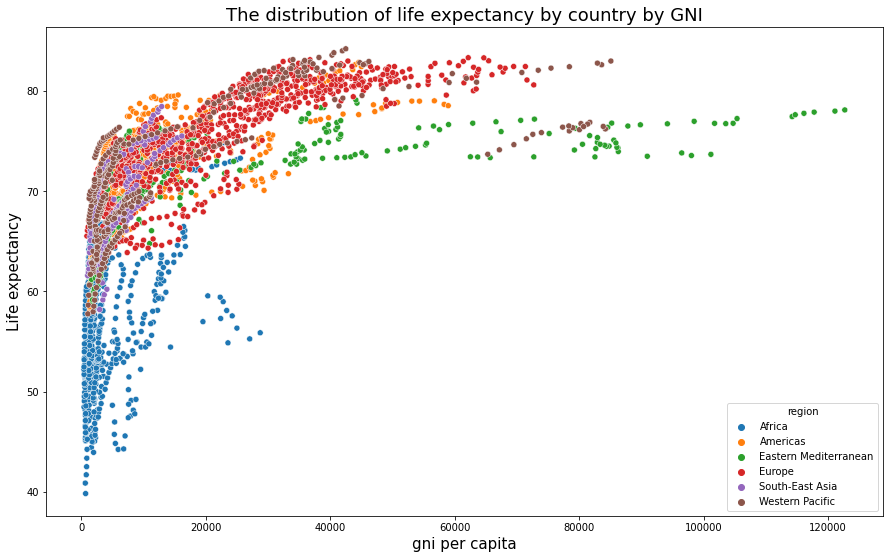

In [52]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=gni_life_expect_df['une_gni'],y=gni_life_expect_df['life_expect'],hue=gni_life_expect_df['region'])
plt.xlabel('gni per capita',size = 15)
plt.ylabel('Life expectancy',size = 15)
plt.title('The distribution of life expectancy by country by GNI',size=18)
plt.show()

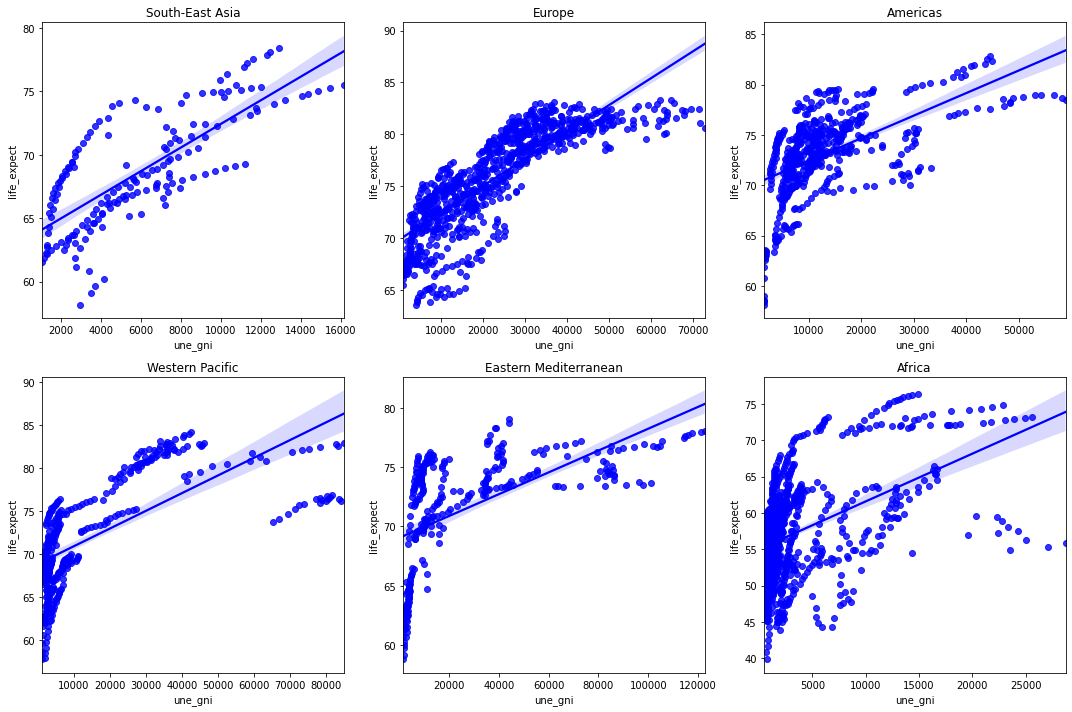

In [53]:
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(gni_life_expect_df["region"]), axs.flat):
    Conts = gni_life_expect_df[gni_life_expect_df['region'] == conts]
    sns.regplot(x = Conts['une_gni'],y = Conts["life_expect"], color = 'blue', ax = ax).set_title(conts)

plt.tight_layout()  
sns.set(color_codes=True)
plt.show()

**Nhận xét:** 
- Tất cả các khu vực đều cho thấy khi gni tăng --> life_expectancy tăng.
- Đường thẳng càng dốc cho biết được tốc độ tăng tuổi thọ càng nhanh và mức độ quan hệ tuyến tuyến càng mạnh.

### Xem GNI của các nước như thế nào và có mối liên quan nào với life expectancy ko?

In [54]:
gni_country = gni_life_expect_df.groupby('country').agg({'une_gni':'mean'}).rename(columns={'une_gni':'mean_une_gni'})
gni_country = gni_country.sort_values(by='mean_une_gni', ascending = False)
gni_country['Rank GNI'] = np.arange(1,gni_country.shape[0]+1)
gni_country

,mean_une_gni,Rank GNI
country,,
Qatar,102436.470588,1
Kuwait,82688.235294,2
Brunei Darussalam,76776.470588,3
United Arab Emirates,72211.176471,4
Singapore,62601.764706,5
...,...,...
Mozambique,818.823529,174
Central African Republic,804.705882,175
Niger,762.352941,176


### Top 10 quốc gia đứng đầu, gni trung bình hàng năm là bao nhiêu?

In [55]:
name_top10_life_expect = top_10_expectancy['country'].tolist()
gni_country.loc[name_top10_life_expect]

,mean_une_gni,Rank GNI
country,,
Japan,34807.647059,24
Switzerland,51006.470588,8
Australia,36175.882353,23
Iceland,36637.647059,21
Italy,33118.235294,27
Spain,29718.823529,28
Sweden,40019.411765,13
Singapore,62601.764706,5
Canada,37754.117647,18


**Nhận xét:** 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới đều có mức gni ( tổng thu nhập trên bình quân đầu người) cao và nằm trong top 30 của thế giới.

### Phân tích số liệu giữa gni với life expectancy

In [56]:
temp_df = data_df.copy()
temp_df['life_expect'] = np.log(temp_df['life_expect'])
temp_df['une_gni'] = np.log(temp_df['une_gni'])
temp_df = temp_df[temp_df['year']==2016]
temp_df = temp_df[~temp_df['une_gni'].isna()]

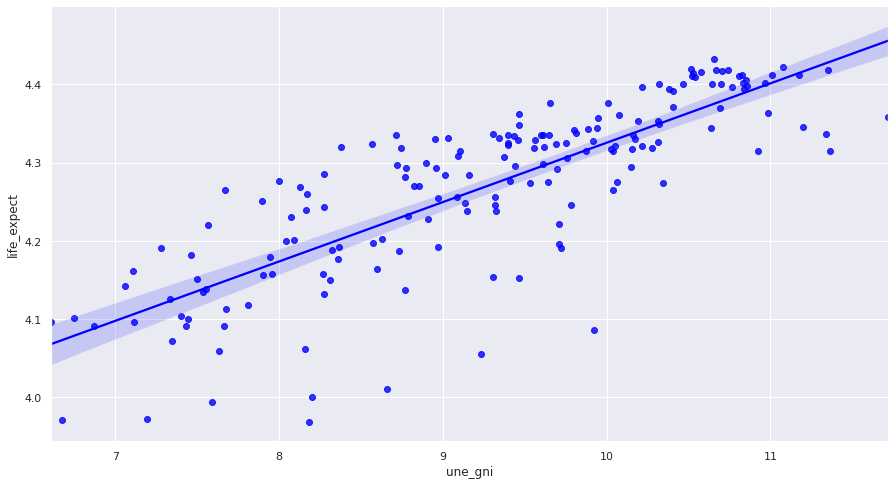

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=temp_df['une_gni'],y=temp_df['life_expect'], color = 'blue', ax = ax)
plt.show()

In [58]:
Y = temp_df['life_expect']
X = temp_df['une_gni']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const      3.566871
une_gni    0.075850
dtype: float64

In [59]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     333.5
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           2.66e-42
Time:                        10:58:54   Log-Likelihood:                 233.71
No. Observations:                 176   AIC:                            -463.4
Df Residuals:                     174   BIC:                            -457.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5669      0.039     91.886      0.0